# Import the dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


# Analyze the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215616 entries, 0 to 215615
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    215616 non-null  object 
 1   county  215616 non-null  object 
 2   state   215616 non-null  object 
 3   fips    213316 non-null  float64
 4   cases   215616 non-null  int64  
 5   deaths  215616 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 7.4+ MB


# Handle with missing data

In [3]:
df.isnull().sum()

date         0
county       0
state        0
fips      2300
cases        0
deaths       0
dtype: int64

In [4]:
df['fips'].fillna(df['fips'].mean(), inplace=True)

In [5]:
df.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

# Change data into numerical

In [6]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [7]:
object_columns = []
for i in df.columns:
    if df[i].dtype==object:
        object_columns.append(i)
print(object_columns)

['date', 'county', 'state']


In [8]:
for i in object_columns:
    df[i] = label.fit_transform(df[i])

# visualization

>Date vs Cases

Text(0.5, 1.0, 'Date vs Cases')

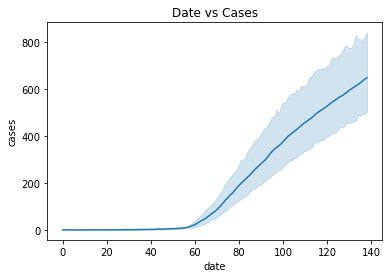

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df
ax = sns.lineplot(x="date", y="cases", data=data)
plt.title('Date vs Cases')

>Date vs Deaths

Text(0.5, 1.0, 'Date vs Cases')

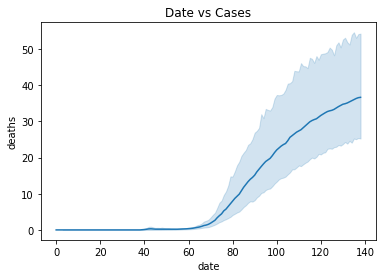

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df
ax = sns.lineplot(x="date", y="deaths", data=data)
plt.title('Date vs Cases')